In [1]:
from Library.DataAnalyzer import DataAnalyzer
from Library.DataPreprocessor import DataPreprocessor
from Library.DataVisualizer import DataVisualizer, ColorPalette, ColorSingle, LineStyle, MarkerType
from Library.ClassificationEngine import ClassificationEngine

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pandas as pd

In [2]:
preprocessor = DataPreprocessor()
analyzer = DataAnalyzer()
visualizer = DataVisualizer()
trainer = ClassificationEngine()

# Define classification algorithms
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
h = GradientBoostingClassifier()

# Add the algorithms you define to the array
myAlgorithmArray = [g, b, k, l, d, r, h] 

# Read File

In [3]:
df = pd.read_csv("Data/Transformed Data Set - Sheet1.csv")

# Exploratory Data Analysis

In [4]:
df.shape

(66, 5)

In [5]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [6]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [7]:
df.corr()

""


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [9]:
analyzer.calculateNullValuesSum(df)

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [10]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [11]:
df["Favorite Color"].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [12]:
df["Favorite Music Genre"].value_counts()

Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: Favorite Music Genre, dtype: int64

In [13]:
df["Favorite Beverage"].value_counts()

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [14]:
df["Favorite Soft Drink"].value_counts()

Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: Favorite Soft Drink, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


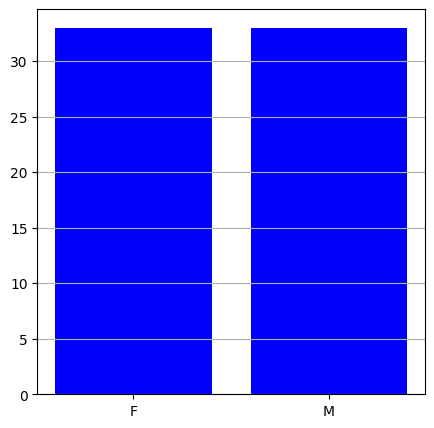

In [16]:
categories = df["Gender"].value_counts().index.tolist()
values = df["Gender"].value_counts().values.tolist()
visualizer.draw_bar_chart(categories, values, figure_height=5, figure_width=5)

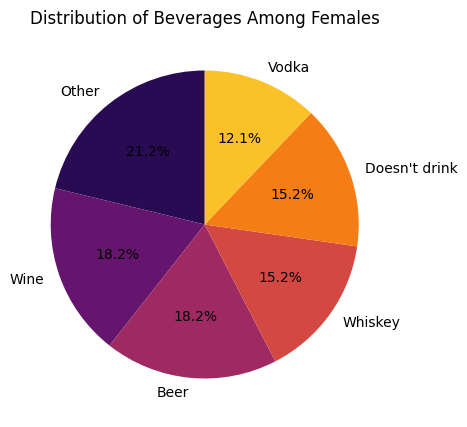

In [17]:
female_beverage_counts = df[df['Gender'] == 'F']['Favorite Beverage'].value_counts()
data = female_beverage_counts.values.tolist()
labels = female_beverage_counts.index.tolist()
visualizer.draw_pie_chart(data, labels, chart_title="Distribution of Beverages Among Females", figure_height=5, figure_width=5, color_palette=ColorPalette.INFERNO)

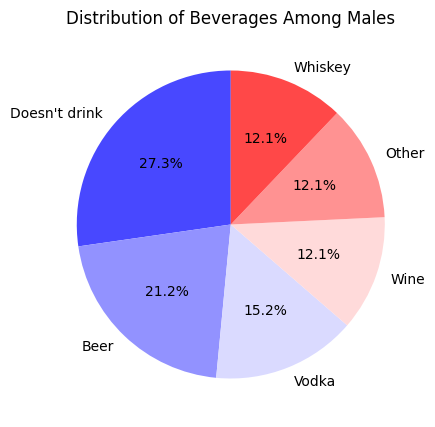

In [18]:
male_beverage_counts = df[df['Gender'] == 'M']['Favorite Beverage'].value_counts()
data = male_beverage_counts.values.tolist()
labels = male_beverage_counts.index.tolist()
visualizer.draw_pie_chart(data, labels, chart_title="Distribution of Beverages Among Males", figure_height=5, figure_width=5, color_palette=ColorPalette.BWR)

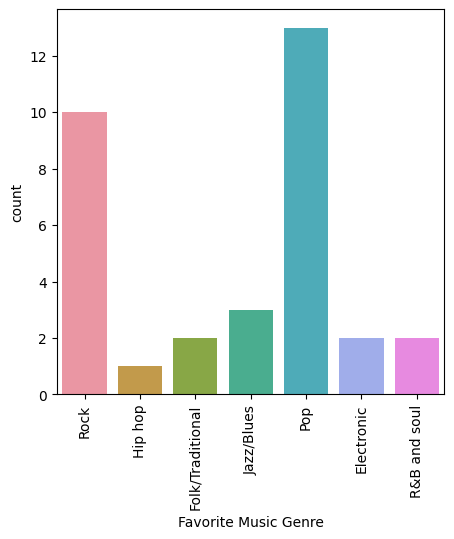

In [19]:
female_df = df[df['Gender'] == 'F']
visualizer.plotColumnChart(female_df, 'Favorite Music Genre', chart_type="Countplot", figSizeH=5, figSizeW=5)

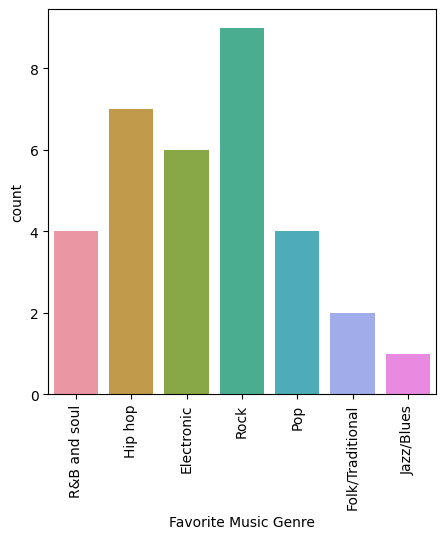

In [20]:
female_df = df[df['Gender'] == 'M']
visualizer.plotColumnChart(female_df, 'Favorite Music Genre', chart_type="Countplot", figSizeH=5, figSizeW=5)

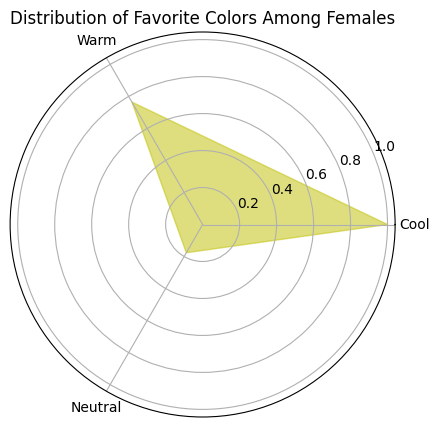

In [21]:
female_favorite_colors_counts = df[df['Gender'] == 'F']['Favorite Color'].value_counts()
labels = female_favorite_colors_counts.index.tolist()
data = female_favorite_colors_counts.values.tolist()
data_normalized = [x / max(data) for x in data]  # Veriyi normalize et
visualizer.draw_radar_chart(data_normalized, labels, color=ColorSingle.YELLOW, chart_title="Distribution of Favorite Colors Among Females", figure_height=5, figure_width=5)

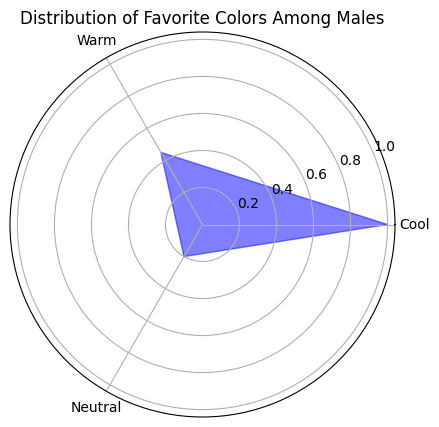

In [22]:
male_favorite_colors_counts = df[df['Gender'] == 'M']['Favorite Color'].value_counts()
labels = male_favorite_colors_counts.index.tolist()
data = male_favorite_colors_counts.values.tolist()
data_normalized = [x / max(data) for x in data]  # Veriyi normalize et
visualizer.draw_radar_chart(data_normalized, labels, color=ColorSingle.BLUE, chart_title="Distribution of Favorite Colors Among Males", figure_height=5, figure_width=5)

In [23]:
x = df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']]
y = df[['Gender']]
x = pd.get_dummies(x, drop_first=True)

In [24]:
trainer.fitAndPredictAll(myAlgorithmArray, x, y)

Classifier                    Accuracy Score    Precision Score
--------------------------  ----------------  -----------------
GaussianNB                          0.714286           0.714286
BernoulliNB                         0.642857           0.645833
KNeighborsClassifier                0.642857           0.645833
LogisticRegression                  0.642857           0.645833
DecisionTreeClassifier              0.642857           0.645833
RandomForestClassifier              0.714286           0.733333
GradientBoostingClassifier          0.642857           0.675
